# Modelos con sobredispersión (Fallas de bombas en planta nuclear)


(Gaver y O’Muircheartaigh (1987)) Estos datos tratan sobre el número de fallas y el tiempo de operación, medido en miles de horas, para 10 bombas de una planta nuclear. Las bombas funcionan en dos modos diferentes: en modo continuo y en modo
intermitente. El objetivo es establecer si la tasa de fallas de las bombas depende del modo en que operan.

* Es importante destacar que se desea analizar la tasa de fallas puesto que si hacemos comparabilidad con el número de fallas esta mal puesto que el numero de fallas depende de cuantas horas llevan operando (se esperaria que el que lleva más tiempo se tenga mas fallas). Por tal motivo se hace un análisis con respecto al numero de fallas con respecto al tiempo (horas) que llevan en operación. "numero de fallas por hora"

In [8]:
rm(list=ls())
setwd("C:\\Users\\YULY\\Desktop\\Desktop\\UNAL 2018\\MLGz\\MLG Vanegas")
library(sqldf)
library(numDeriv)
library(Rfast)
source("macros.txt")
source("test.txt")

In [9]:
#Lectura de los datos
fallas<-c(5,1,5,14,3,19,1,1,4,22)
tiempo<-c(94.32, 15.72, 62.88, 125.76, 5.24, 31.44, 1.048, 1.048, 2.096, 10.48)
modo<-c("continuo", "itermitente","continuo","continuo","itermitente","continuo","itermitente","itermitente","itermitente","itermitente")
bombas<-data.frame(fallas, tiempo, modo); bombas
table(bombas$fallas)

fallas,tiempo,modo
5,94.320,continuo
1,15.720,itermitente
5,62.880,continuo
14,125.760,continuo
3,5.240,itermitente
19,31.440,continuo
1,1.048,itermitente
1,1.048,itermitente
4,2.096,itermitente
22,10.480,itermitente



 1  3  4  5 14 19 22 
 3  1  1  2  1  1  1 

En lo que corresponde a las fallas de las 10 bombas de la planta nuclear se puede especificar que tres de las bombas tienen una falla, 2 bombas de la planta nuclear tienen 5 fallas y lo más preocupante una tiene 22 fallas.


# A)

Ajuste un MLG poisson con función de enlace logaritmo natural donde el número de fallas de las bombas es la variable respuesta, el modo de operación es la variable explicativa, y el logaritmo natural del tiempo de operación es el offset. Evalúe si hay indicios de la presencia de sobredispersión.

Ha de notarse de las variables que una es de tipo categorico **modo** la cual hace correspondencia al tipo de funcionamiento de la bomba en la planta. El número de fallas es claramente un **conteo** y la distribución que más se ajusta la variable rta es la Poisson. A continuación se realiza el ajuste en referencia a las especificaciones A):

In [10]:
###################### Estimación del modelo ######################
fit11 <- glm(fallas ~ modo*offset(log(tiempo)), family=poisson(link="log"), data=bombas)
summary(fit11)


Call:
glm(formula = fallas ~ modo * offset(log(tiempo)), family = poisson(link = "log"), 
    data = bombas)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.5761  -1.2104  -0.3688   1.0198   5.2020  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -1.9895     0.1525 -13.046  < 2e-16 ***
modoitermitente   1.8820     0.2335   8.061 7.56e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 124.538  on 9  degrees of freedom
Residual deviance:  71.433  on 8  degrees of freedom
AIC: 108.87

Number of Fisher Scoring iterations: 5


La interpretación de los parámetros indica que la tasa esperada de fallas en las bombas es mayor cuando está en modo itermitente que cuando funcionan de modo continuo. 

In [11]:
gof_glm(fit11)


  Family:  poisson 
    Link:  log 
                                                    Df    Value
Residual deviance                                    8  71.4325
Pearson's statistic                                  8  89.2271
Adjusted R-squared based on the residual deviance        0.3547
Adjusted R-squared based on the Pearson's statistic      0.6099
-2*log-Likelihood                                      104.8678
AIC                                                    108.8678
BIC                                                    109.4729




Se conoce que en el caso de la Poisson el $\phi$ es conocido y es 1. No obstante para conocer $\phi$ estimamos mediante:

$$\widehat{\phi}= \frac{D(y; \widehat{\mu})}{n-p}$$

$$\widetilde{\phi}= \frac{P(y; \widehat{\mu})}{n-p}$$

Donde estos valores son demasiado grandes 11 y o veces, se esperaría que fuera cercano a 1, es decir que estamos en un indicio de sobredispersión. Veamos el envelope:

In [12]:
71.4325/8
89.2271/8

[1] 8.929063

[1] 11.15339

  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100%


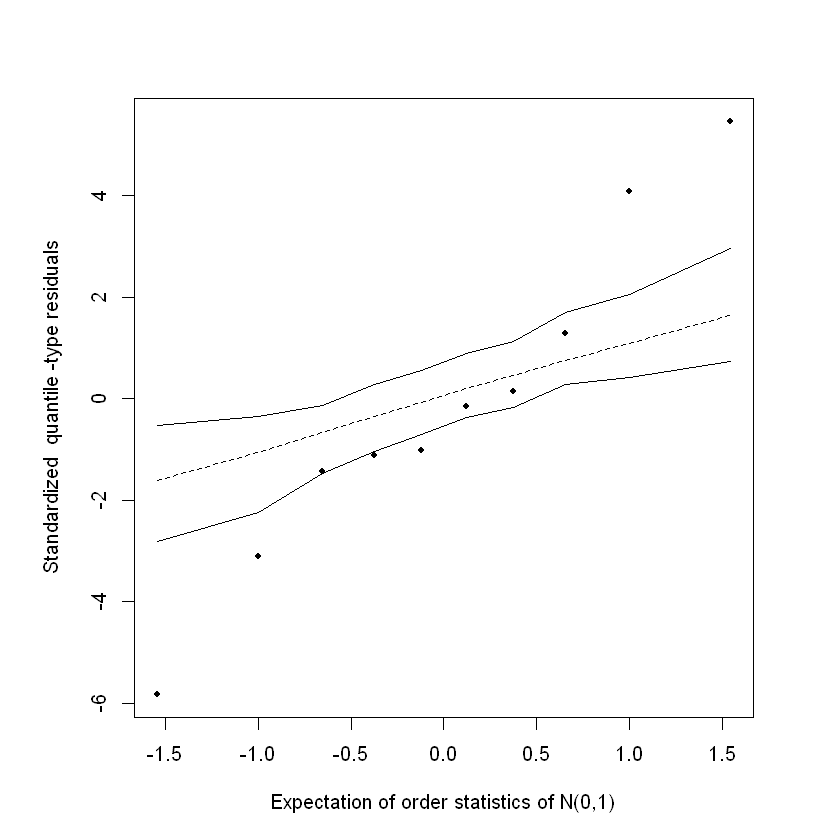

In [6]:
envelope_glm(fit11,rep=100)

Al igual como se especifica con las estimaciones de $\phi$, en el envelope los residuos positivos tienden a ser más positivos saliéndose de las bandas. Así mimso residuos negativos con tendencia a ser más negativos y saliéndose de las bandas. Por lo cual se afirma el hecho de sobredispersión.

# B)

Ajuste modelos binomial negativa I, binomial negativa II y poisson-normal.inversa con funcón de enlace logaritmo natural donde el número de fallas de las bombas es la variable respuesta, el modo de operación es la variable explicativa, y el logaritmo natural del tiempo de operación es el offset. Compare con lo obtenido en (A), especialmente las magnitudes de los errores estándar. Comente.

In [7]:
fit21 <-  overglm(fallas ~ modo*offset(log(tiempo)), family="nb1(log)", data=bombas)
fit31 <-  overglm(fallas ~ modo*offset(log(tiempo)), family="nb2(log)", data=bombas)
fit41 <-  overglm(fallas ~ modo*offset(log(tiempo)), family="poig(log)", data=bombas)  #

In [8]:
BIC(fit21,fit31,fit41)
AIC(fit21,fit31,fit41)


     Link:  log 
Predictor:  1 + offset(log(tiempo)) + modo 

 Object                   Family -2*log-likelihood df     BIC 
  fit21      Negative Binomial I          59.65156  3 66.55931
  fit31     Negative Binomial II          65.80796  3 72.71571
  fit41 Poisson-Inverse.Gaussian          61.10080  3 68.00856

     Link:  log 
Predictor:  1 + offset(log(tiempo)) + modo 

 Object                   Family -2*log-likelihood df     AIC 
  fit21      Negative Binomial I          59.65156  3 65.65156
  fit31     Negative Binomial II          65.80796  3 71.80796
  fit41 Poisson-Inverse.Gaussian          61.10080  3 67.10080


En correspondencia a las estimaciones del modelo, se puede especificar que el mejor modelo en terminos de menor AIC  y BIC, está determinado por:  Negative Binomial I con función de enlace log. Veamos las estimaciones:

In [9]:
summary(fit21)


Sample size:  10 
     Family:  Negative Binomial I
       Link:  log
 *************************************************************
                Estimate Std.Error  z-value   Pr(>|z|)
(Intercept)     -1.60355   0.47266 -3.39258 0.00069237
modoitermitente  1.67300   0.64045  2.61223 0.00899524

                Estimate Std.Error
Dispersion       0.77035   0.37273
 *************************************************************
                 -2*log-likelihood:  59.652 
                               AIC:  65.652 
                               BIC:  66.559 


En referencia a las estimaciones de los parámetros del modelo se puede decir que siguen siendo significativos, en el modelo *poisson* los parámetros son $(-1.9895, 1.882)$ y existen cambios sutanciales con respecto a los del modelo *Negative Binomial I* , no pobstante al estar presente la sobredispersión se especifica que se está subestimando con los errores estándar en el modelo Poisson los cuales son: (0.15, 0.23), es decir que con el nuevo ajuste *Negative Binomial I* se esperan que sean mayores. En realidad sucede. 



# C) 

Use los criterios AIC y BIC para comparar los modelos seleccionados en (A) y (B). Cual de ellos parece describir mejor los datos?

In [10]:
BIC(fit11, fit21)
AIC(fit11, fit21)

,df,BIC
fit11,2,109.4729
fit21,3,NA


,df,AIC
fit11,2,108.86776
fit21,3,65.65156


En correspondencia a los valores del AIC, BIC del los dos modelos, se afirma que el mejor modelo está derterminado por *Negative Binomial I* con función de enlace log.

# D) 

Use el test de Wald y el test de razón de verosimilitudes para evaluar, al nivel de significancia aproximado de 5%, si la tasa esperada de fallas en las bombas depende del modo en que ellas operan.

### Test Wald
Para contrastar la prueba se tiene el siguiente sistema de hipótesis:

$$H_{0}: \beta_2=0 \;\;\;\;\; vs \;\;\;\;\;\;H_{1}: \beta_2 \neq 0 $$

donde 

$$ \xi _{W} = (\hat{\beta_2}  - \beta_2^{0})' [\hat{Var}(\hat{\beta_2})]^{-1}(\hat{\beta_2}  - \beta_2^{0})$$


In [11]:
fit <-  overglm(fallas ~ 1, family="nb1(log)", data=bombas)
anova_glm(fit21,fit,test="wald") #test de wald


  Wald test 

 Model 1:  fallas ~ modo * offset(log(tiempo)) 
 Model 2:  fallas ~ 1 

   Chi    Df   Pr(>Chi)   
  6.8238   1   0.008995 **


Consideradndo las anteriores salidas se rechaza $H_0$ a un nivel de significancia APROXIMADO del 100$ \alpha\%$ puesto que $\xi _{W}=6.8238 >\chi^2(1)$ Afirmandose que $\beta_2$ es significativo en el modelo. Es decír **tasa esperada de fallas en las bombas SI depende del modo en que ellas operan.**

### Test Razón de verosimilitudes

In [12]:
anova_glm(fit21,fit, test = "lrt")  


  Likelihood-ratio test 

 Model 1:  fallas ~ modo * offset(log(tiempo)) 
 Model 2:  fallas ~ 1 

   Chi    Df   Pr(>Chi)
  1.8445   1     0.1744


# E) 

Realice el análisis de diagnóstico al modelo. Comente.

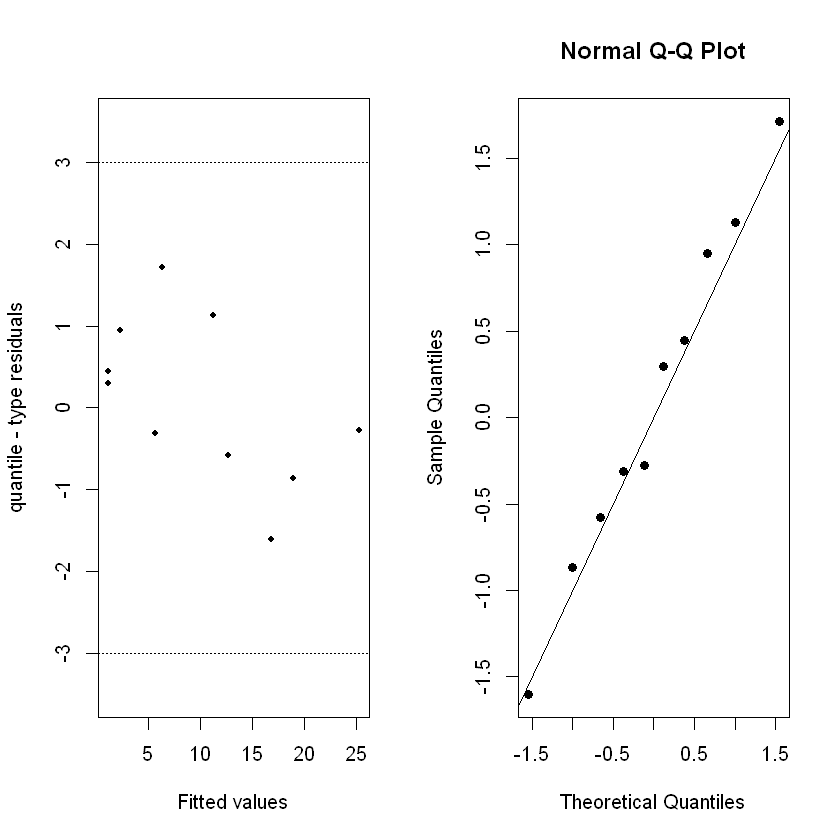

In [13]:
################################# Diagnóstico del modelo seleccionado #################################
###################### Análisis de residuos ######################
par(mfrow=c(1,2))
res <- residuals(fit21,plot=TRUE,type="quantile",identify=1)
qqnorm(res,pch=16)
abline(0,1)

Para este caso no se tiene el envelope, sin embargo se tienen los residuos cuantil y estos deben distribuir normal(0,1) cuando son correctos. En los que se puede ver que siguen el patron de linea recta.

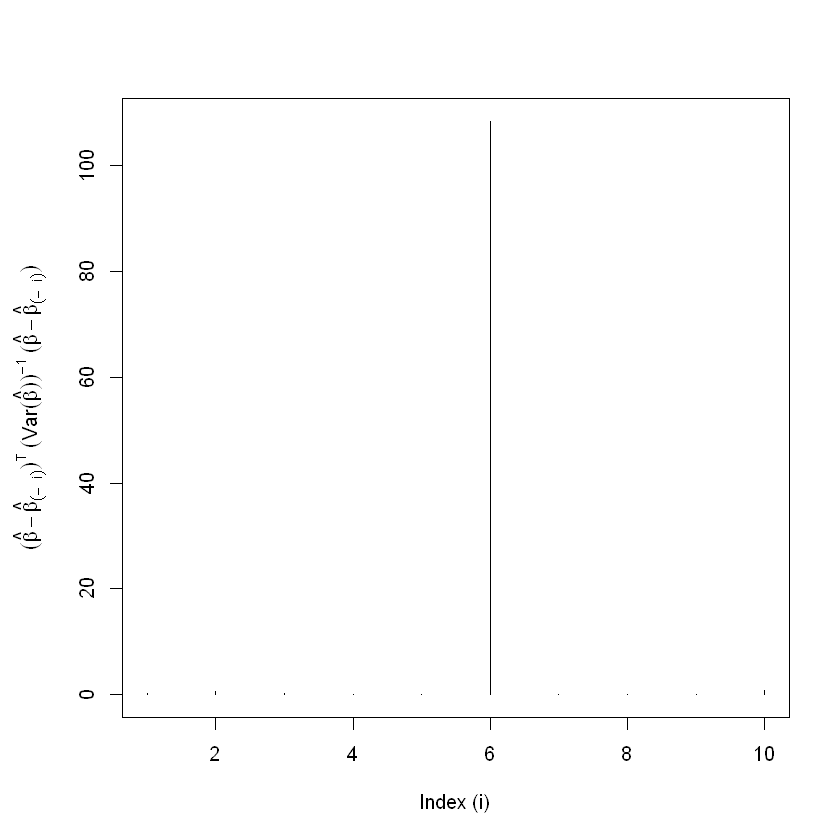

In [14]:
###################### Análisis de sensibilidad ######################
CookDistance(fit21,plot=TRUE,out=FALSE,identify=1)

Se observa que la bomba 10 la cual trabaja de manera itermitente y que tiene 10 fallas es la observación que tiene mayor distancia de Coock, esto implica que hay que hacerse algo inmediatamente.

# F)

Interprete las estimaciones de los parámetros del modelo excepto el intercepto.


$$log(\mu_k)= \beta_1^{*}  + \beta_2 ModoItermitente_{k} + log(tiempo_k)$$
 

Se describe el número esperado de fallas en bombas como:

$$\mu_k=  Exp[ \beta_1^{*}  + \beta_2 ModoItermitente_{k} + log(tiempo_k)]$$
 
Considerando que se desea comparar a dos bombas, una de ellas con funcionamiento itermitente y otra funcionamiento normal (base) se tiene:
  
 $$\mu_k= \frac{ exp[ \beta_1^{*}+\beta_2 (ModoItermitente_{k} +\delta)+ log(tiempo_k)  ]}{exp[  \beta_1^{*}  + \beta_2 ModoItermitente_{k} + log(tiempo_k)  } = exp(\delta \beta_2) $$
 
Al suponer que $\hat{\beta}_2=1.67300 $, se tiene:

  $$exp(\hat{\beta}_2) = exp( 1.67300 )=5.328$$
 
* Al comparar dos bombas una con funcionamineto continuo y otra itermitente se tiene que el número esperado de fallas por cada en bombas itermitentes es aproximadamente mayor en un $32\%$ con respecto a los que trabajan normalmente (rango base).
